In [ ]:
import warnings #importa advertencias
warnings.filterwarnings('ignore') #ignora las advertencias
import pandas as pd
import numpy as np
import seaborn as sns #sirve ara los graficos
import matplotlib.pyplot as plt #libreria de matematica
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#from sklearn.externals import joblib

1: Diabetes
0: No Diabetes

In [ ]:
diabetesDF = pd.read_csv('diabetes.csv')
diabetesDF

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# asegurarnos que los datos estan limpios
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetesDF.shape

(768, 9)

In [ ]:
diabetesDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetesDF[["Glucose" ]]

,Glucose
0,148
1,85
2,183
3,89
4,137
...,...
763,101
764,122
765,121
766,126


In [ ]:
diabetesDF[["Glucose", "Age"]]

,Glucose,Age
0,148,50
1,85,31
2,183,32
3,89,21
4,137,33
...,...,...
763,101,63
764,122,27
765,121,30
766,126,47


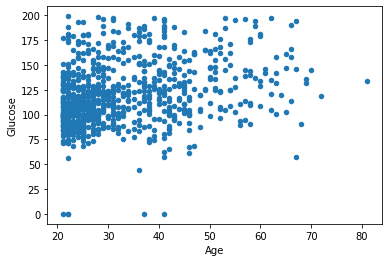

In [ ]:
diabetesDF.plot.scatter(y="Glucose", x="Age")

In [ ]:
diabetesDF.Glucose.value_counts()

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

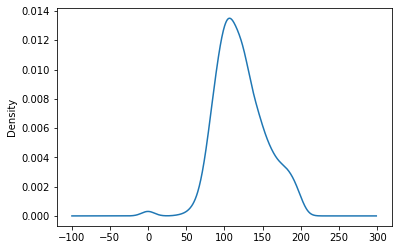

In [ ]:
diabetesDF.Glucose.plot.density()

**EXPLORACIÓN DE DATOS**

ENCONTRAMOS CORRELACION DE DATOS PARA QUE  CADA PAR DE CARACTERISTICAS (Y LA VARIABLE DE SALIDA), Y VISUALIZAR LAS CORRELACIONES USANDO UN MAPA DE CALOR.

---



In [ ]:
corr = diabetesDF.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
diabetesDF.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

### Interpretación
En el mapa los colores más brillantes indican más correlación. Como podemos ver en la tabla y el mapa de calor, los niveles de glucosa, la edad, el BMI y el número de embarazos tienen una correlación significativa con la variable de salida

Observar la correlación entre pares de características, como edad y embarazos, o insulina y grosor de la piel.

---



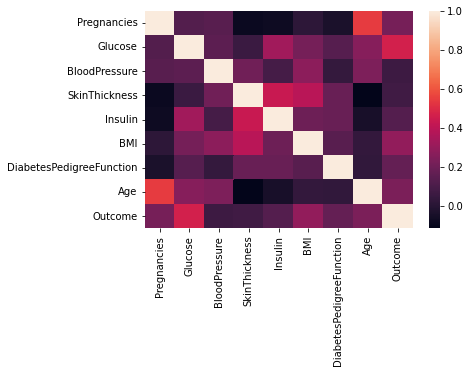

In [ ]:
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns)

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

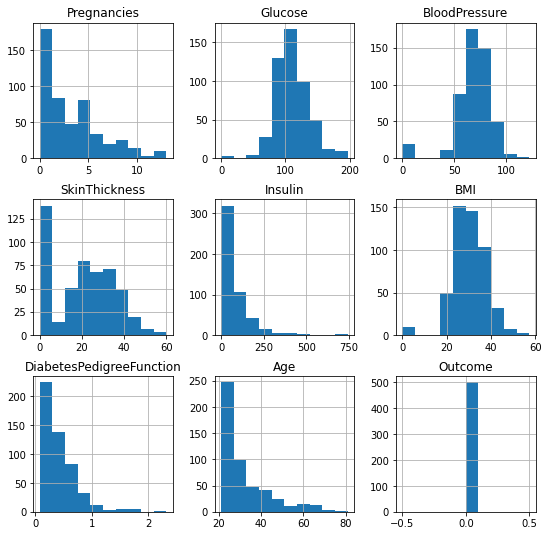

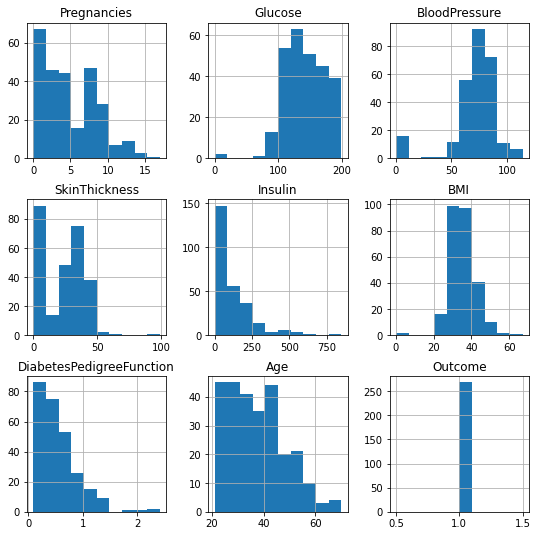

In [ ]:
diabetesDF.groupby('Outcome').hist(figsize=(9, 9))

In [ ]:
# 768 pacientes en total
# 650 para entrenar; 100 para prueba
# 68 para predecir

dfTrain = diabetesDF[:650]
dfTest = diabetesDF[650:750]
dfCheck = diabetesDF[750:]

In [ ]:
features  = list(diabetesDF.columns[0:8])
diabetesDF[features]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
diabetesDF['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(diabetesDF[features], diabetesDF['Outcome'], test_size=0.25,
                                                    stratify=diabetesDF['Outcome'], random_state=30)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
560,6,125,76,0,0,33.8,0.121,54
708,9,164,78,0,0,32.8,0.148,45
511,0,139,62,17,210,22.1,0.207,21
28,13,145,82,19,110,22.2,0.245,57
10,4,110,92,0,0,37.6,0.191,30
...,...,...,...,...,...,...,...,...
338,9,152,78,34,171,34.2,0.893,33
684,5,136,82,0,0,0.0,0.640,69
556,1,97,70,40,0,38.1,0.218,30
763,10,101,76,48,180,32.9,0.171,63


In [ ]:
# 768 pacientes en total
# 650 para entrenar; 100 para prueba
# 68 para predecir

dfTrain = diabetesDF[:650]
dfTest = diabetesDF[650:750]
dfCheck = diabetesDF[750:]

In [ ]:
#Separamos labels y features, convertir a matriz numpy, para entrenar
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))

Text(0.5, 1.0, 'Cantidad para cada clase')

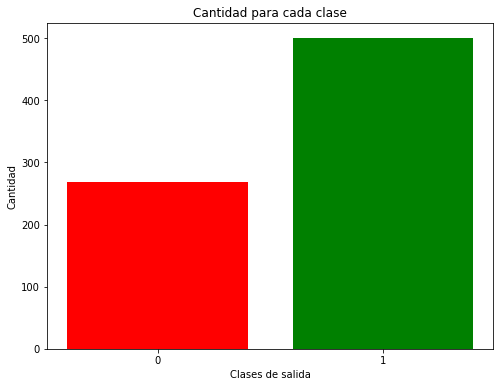

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
plt.bar(diabetesDF['Outcome'].unique(), diabetesDF['Outcome'].value_counts(), color = ['green', 'red'])
plt.xticks([0, 1])
plt.xlabel('Clases de salida')
plt.ylabel('Cantidad')
plt.title('Cantidad para cada clase')

Text(0.5, 1.0, 'Relación entre edad y la salida')

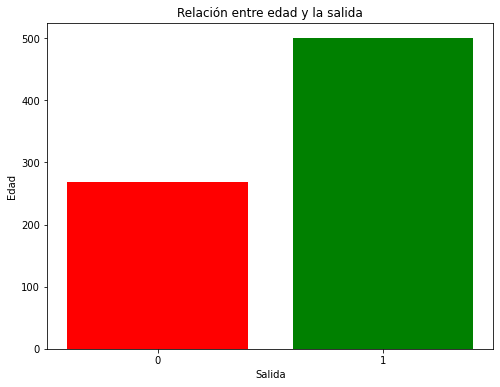

In [ ]:
plt.bar(diabetesDF['Outcome'].unique(), diabetesDF.groupby ('Outcome')['Age'].count(), color = ['green', 'red'])
plt.xticks([0, 1])
plt.xlabel('Salida')
plt.ylabel('Edad')
plt.title('Relación entre edad y la salida')

In [ ]:
# Normalizar los datos
means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)

X_train = (X_train - means)/stds
X_test = (X_test - means)/stds

In [ ]:
# Crear una instancia
diabetesCheck = LogisticRegression()

# Entrenar
diabetesCheck.fit(X_train,Y_train)

# obtener los datos de exactitud
accuracy = diabetesCheck.score(X_test,Y_test)
print("accuracy = ",accuracy * 100,"%")

accuracy =  77.08333333333334 %


In [ ]:
labels=diabetesDF.head(0)
labels= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
labels

In [ ]:
coeff = list(diabetesCheck.coef_[0])
coeff

In [ ]:
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importancia')